<a href="https://colab.research.google.com/github/sahalshajahan/CNNs-Chest-Cancer-Detection-/blob/main/Chest_Cancer_CT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNNs CHEST CANCER DETECTION USING CT SCAN!**

# This project investigates the application of Convolutional Neural Networks (CNNs) for automated chest cancer detection using CT scans. The goal is to develop a robust and accurate deep learning model that can aid radiologists in early diagnosis and improve patient outcomes.

# **Importing Libraries.**

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import os
import numpy as np
from skimage.io import imread

**Defines three variables: `test_folder`, `train_folder`, and `val_folder`.**

In [2]:
test_folder= "/content/drive/MyDrive/chest_cancer_detection_cnn/test"
train_folder = "/content/drive/MyDrive/chest_cancer_detection_cnn/train"
val_folder = "/content/drive/MyDrive/chest_cancer_detection_cnn/valid"

Defines a function `get_ds_size` that calculates the number of images in each subfolder within a given directory, and then it uses that function to determine the number of images in your test, train, and validation sets.

In [3]:
def get_ds_size(folder_path):
    num_of_images = {}
    for folder in os.listdir(folder_path):
        num_of_images[folder] = len(os.listdir(os.path.join(folder_path, folder)))
    return num_of_images

test_set = get_ds_size(test_folder)
train_set = get_ds_size(train_folder)
val_set = get_ds_size(val_folder)

print("Test Set: \n", test_set, "\n\n", "Train Set: \n", train_set, "\n\n", "Val Set: \n", val_set, "\n\n",)

Test Set: 
 {'normal': 54, 'squamous.cell.carcinoma': 90, 'large.cell.carcinoma': 51, 'adenocarcinoma': 120} 

 Train Set: 
 {'normal': 148, 'adenocarcinoma': 195, 'large.cell.carcinoma': 115, 'squamous.cell.carcinoma': 155} 

 Val Set: 
 {'normal': 13, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 21, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 15, 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 23} 




**A bar chart to visualize the distribution of images across your test, train, and validation sets for each class in chest CT scan dataset.**

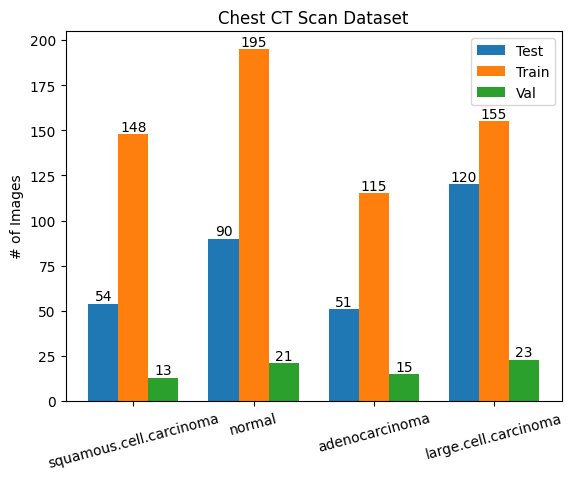

In [4]:
labels = ["squamous.cell.carcinoma", "normal", "adenocarcinoma", "large.cell.carcinoma"]

test_list = list(test_set.values())
train_list = list(train_set.values())
val_list = list(val_set.values())

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
test_bar = ax.bar(x - width, test_list, width, label="Test")
train_bar = ax.bar(x, train_list, width, label="Train")
val_bar = ax.bar(x + width, val_list, width, label="Val")

ax.set_ylabel('# of Images')
ax.set_title('Chest CT Scan Dataset')
ax.set_xticks(x, labels)
plt.xticks(rotation=15)
ax.legend()
ax.bar_label(test_bar)
ax.bar_label(train_bar)
ax.bar_label(val_bar)

# fig.tight_layout()
plt.show()

In [45]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=1
EPOCH=20

 Utilizes the `tf.keras.preprocessing.image_dataset_from_directory` function from TensorFlow to create image datasets for training, validation, and testing in chest cancer detection project.

In [26]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(test_folder,shuffle=True,image_size = (IMAGE_SIZE, IMAGE_SIZE),batch_size = BATCH_SIZE,color_mode = "grayscale")

train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_folder,shuffle=True,image_size = (IMAGE_SIZE, IMAGE_SIZE),batch_size = BATCH_SIZE,color_mode = "grayscale")

val_ds = tf.keras.preprocessing.image_dataset_from_directory(val_folder,shuffle=True,image_size = (IMAGE_SIZE, IMAGE_SIZE),batch_size = BATCH_SIZE,color_mode = "grayscale")


Found 315 files belonging to 4 classes.
Found 613 files belonging to 4 classes.
Found 72 files belonging to 4 classes.


In [27]:
test_class_names = test_ds.class_names
test_class_names

['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

In [28]:
train_class_names = train_ds.class_names
train_class_names

['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

In [29]:
val_class_names = val_ds.class_names
val_class_names

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib',
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
 'normal',
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']

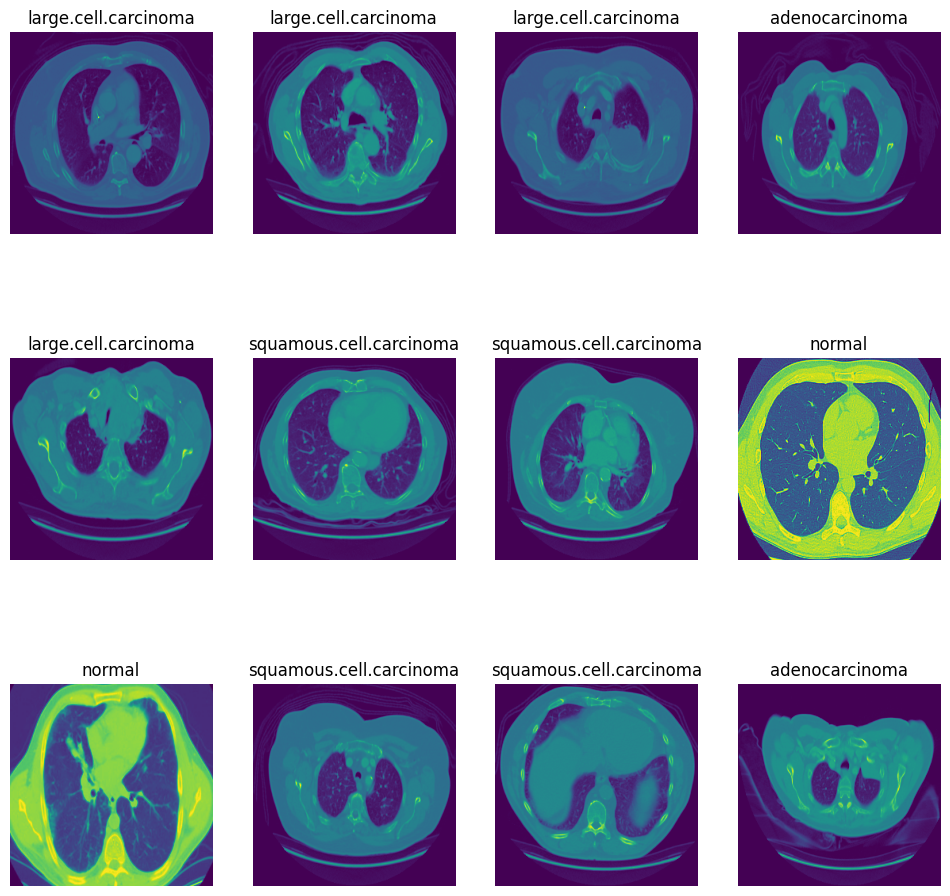

In [30]:
plt.figure(figsize=(12,12))
for image_batch, label_batch in test_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(test_class_names[label_batch[i]])
    plt.axis("off")

In [31]:
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [32]:
resize_and_rescale = tf.keras.Sequential([layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),layers.Rescaling(1.0/255)])

In [33]:
data_augmentation = tf.keras.Sequential([layers.RandomFlip("horizontal_and_vertical"),layers.RandomRotation(0.2),])

Defines the architecture of your CNN model for chest cancer detection using TensorFlow's `models.Sequential` API.

In [34]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([resize_and_rescale,data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),])

model.build(input_shape=input_shape)

In [35]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 1)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 1)         0         
                                                                 
 conv2d_4 (Conv2D)           (32, 254, 254, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

Compiles your CNN model for chest cancer detection, specifying the optimizer, loss function, and metrics to be used during training.

In [36]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

 Trains your CNN model for chest cancer detection using the compiled model, training data (`train_ds`), validation data `(val_ds`), and defined hyperparameters.

In [46]:
history = model.fit(train_ds,epochs=EPOCH,batch_size=BATCH_SIZE,verbose=1,validation_data=val_ds)

Epoch 1/20
20/20 [==============================] - 1s 63ms/step - loss: 0.4388 - accuracy: 0.8124 - val_loss: 0.8168 - val_accuracy: 0.6944
Epoch 2/20
20/20 [==============================] - 1s 60ms/step - loss: 0.4230 - accuracy: 0.8075 - val_loss: 0.9474 - val_accuracy: 0.6667
Epoch 3/20
20/20 [==============================] - 1s 60ms/step - loss: 0.4218 - accuracy: 0.8206 - val_loss: 0.9391 - val_accuracy: 0.6667
Epoch 4/20
20/20 [==============================] - 1s 60ms/step - loss: 0.3893 - accuracy: 0.8271 - val_loss: 0.9982 - val_accuracy: 0.6944
Epoch 5/20
20/20 [==============================] - 1s 61ms/step - loss: 0.4100 - accuracy: 0.8238 - val_loss: 1.0232 - val_accuracy: 0.6528
Epoch 6/20
20/20 [==============================] - 1s 61ms/step - loss: 0.3915 - accuracy: 0.8206 - val_loss: 0.8164 - val_accuracy: 0.6944
Epoch 7/20
20/20 [==============================] - 1s 62ms/step - loss: 0.3383 - accuracy: 0.8515 - val_loss: 0.8878 - val_accuracy: 0.7083
Epoch 8/20
20

In [47]:
scores = model.evaluate(val_ds)

3/3 [==============================] - 0s 18ms/step - loss: 0.9840 - accuracy: 0.6944


In [48]:
scores

[0.9840390682220459, 0.6944444179534912]

In [49]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 20}

In [50]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


creates a visualization of the training and validation accuracy and loss curves for your CNN model, likely obtained from the `History` object returned by `model.fit.`

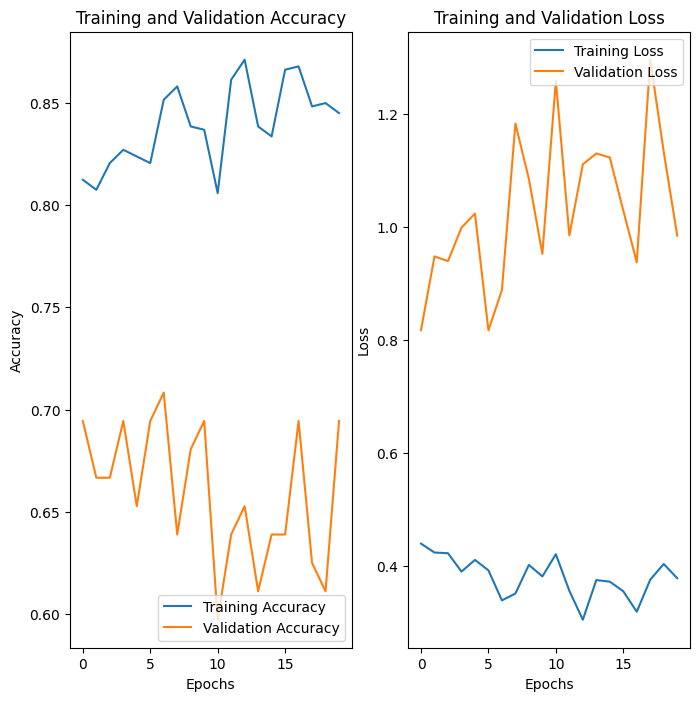

In [52]:
plt.figure(figsize=(8,8))

plt.subplot(1, 2, 1)
plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCH), loss, label='Training Loss')
plt.plot(range(EPOCH), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


plt.show()

first image to predict
actual label: large.cell.carcinoma
1/1 [==============================] - 0s 25ms/step
predicted label: large.cell.carcinoma


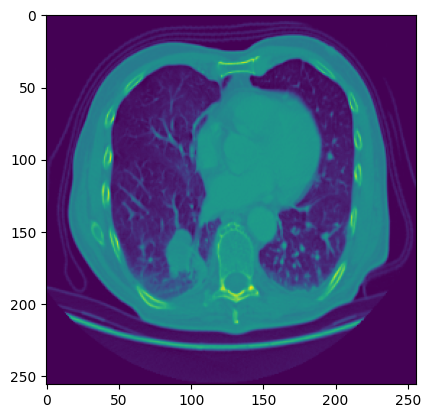

In [53]:
for images_batch, labels_batch in test_ds.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = labels_batch[0].numpy()

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label:", test_class_names[first_label])

  batch_prediction = model.predict(images_batch)
  print("predicted label:", test_class_names[np.argmax(batch_prediction[0])])